# NAME:- RAHUL ASHOK PATIL

# PROJECT:-
SOLVING CLASSIFICATION PREDICTION FOR  "MACHINE FAILURE PREDICTION USING SENSOR DATA"  DATASET USING LOGISTIC REGRESSION, NAIVES BAYES, CLASSIFICATION ,SUPPORT VECTOR CLASSIFIER,
       K NEAREST NEIGHBOUR, DECISION TREE CLASSIFIER.

# ABOUT PROJECT:-
 THIS DATASET CONTAINS SENSOR DATA COLLECTED FROM VARIOUS MACHINES, WITH THE AIM OF PREDICTING MACHINE FAILURES IN ADVANCE. IT INCLUDES A VARIETY OF SENSOR READINGS AS WELL AS THE RECORDED MACHINE FAILURES.


# DATA:-
      FOOTFALL: The number of people or objects passing by the machine.
      TEMPMODE: The temperature mode or setting of the machine.
      AQ: Air quality index near the machine.
      USS: Ultrasonic sensor data, indicating proximity measurements.
      CS: Current sensor readings, indicating the electrical current usage of the machine.
      VOC: Volatile organic compounds level detected near the machine.
      RP: Rotational position or RPM (revolutions per minute) of the machine parts.
      IP: Input pressure to the machine.
      TEMPERATURE: The operating temperature of the machine.
      FAIL: Binary indicator of machine failure (1 for failure, 0 for no failure).



# APPROACH:-
1.LOAD THE REQUIRED LIBRARIES SUCH AS PANDAS , MATPLOTLIB, SEABORN , NUMPY, ALONG WITH THE GIVEN DATASET.
 
2.PERFORM EDA ON THE GIVEN DATASET.

3.IMPORT 'LOGISTIC REGRESSION , NAIVES BAYES, CLASSIFICATION ,SUPPORT VECTOR CLASSIFIER,
       K NEAREST NEIGHBOUR, DECISION TREE CLASSIFIER'.AND SPLIT THE GIVEN DATASET INTO TRAINING AND TESTING DATA USING 
       TRAIN_TEST_SPLIT.THEN CALCULATE ACCURACY SCORE USING SKLEARN LIBRARY BY IMPORTING METRICS.

4.ONCE WE GET ACCURACY SCORE OF ALL MODELS FOR BOTH TRAINING AND TESTING DATA, CREATE A DATAFRAME AND LOAD ALL 
       THE ACCURACY OF ALL MODEL.

5.VISUALIZATION: ONCE THE DATASET IS CREATED PLOT THE ACCURACY OF ALL THE MODELS USING BARPLOT 

In [28]:
import pandas as pd   
import matplotlib.pyplot as plt                #LOADING ALL THE REQURIED LIBRARIES.
import seaborn as sns 
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [29]:
D=pd.read_csv(r"C:\Users\RAHUL PATIL\Downloads\data.csv")  #LOADING THE GIVEN DATASET
D

,footfall,tempMode,AQ,USS,CS,VOC,RP,IP,Temperature,fail
0,0,7,7,1,6,6,36,3,1,1
1,190,1,3,3,5,1,20,4,1,0
2,31,7,2,2,6,1,24,6,1,0
3,83,4,3,4,5,1,28,6,1,0
4,640,7,5,6,4,0,68,6,1,0
...,...,...,...,...,...,...,...,...,...,...
939,0,7,7,1,6,4,73,6,24,1
940,0,7,5,2,6,6,50,6,24,1
941,0,3,6,2,7,5,43,6,24,1
942,0,6,6,2,5,6,46,7,24,1


In [30]:
D.isna().sum() #CHECKING NULL VALUES

footfall       0
tempMode       0
AQ             0
USS            0
CS             0
VOC            0
RP             0
IP             0
Temperature    0
fail           0
dtype: int64

In [31]:
D.info() #SHOWS ALL INFORMATION REGARDING THE DATA SUCH AS NULL VALUE,COLUMNS ,DATATYPES

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 944 entries, 0 to 943
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   footfall     944 non-null    int64
 1   tempMode     944 non-null    int64
 2   AQ           944 non-null    int64
 3   USS          944 non-null    int64
 4   CS           944 non-null    int64
 5   VOC          944 non-null    int64
 6   RP           944 non-null    int64
 7   IP           944 non-null    int64
 8   Temperature  944 non-null    int64
 9   fail         944 non-null    int64
dtypes: int64(10)
memory usage: 73.9 KB


In [32]:
D.describe() #SHOWS THE ALL DETAILS REGARDING  ALL NUMERICAL COLUMNS

,footfall,tempMode,AQ,USS,CS,VOC,RP,IP,Temperature,fail
count,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000
mean,306.381356,3.727754,4.325212,2.939619,5.394068,2.842161,47.043432,4.565678,16.331568,0.416314
std,1082.606745,2.677235,1.438436,1.383725,1.269349,2.273337,16.423130,1.599287,5.974781,0.493208
min,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,19.000000,1.000000,1.000000,0.000000
25%,1.000000,1.000000,3.000000,2.000000,5.000000,1.000000,34.000000,3.000000,14.000000,0.000000
50%,22.000000,3.000000,4.000000,3.000000,6.000000,2.000000,44.000000,4.000000,17.000000,0.000000
75%,110.000000,7.000000,6.000000,4.000000,6.000000,5.000000,58.000000,6.000000,21.000000,1.000000
max,7300.000000,7.000000,7.000000,7.000000,7.000000,6.000000,91.000000,7.000000,24.000000,1.000000


In [33]:
D.shape #shows no. of rows and columns

(944, 10)

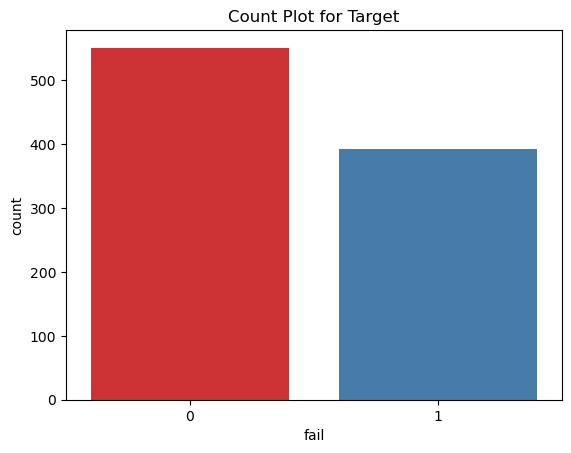

In [34]:
sns.countplot(data=D,x='fail',palette='Set1')
plt.title('Count Plot for Target')
plt.show()

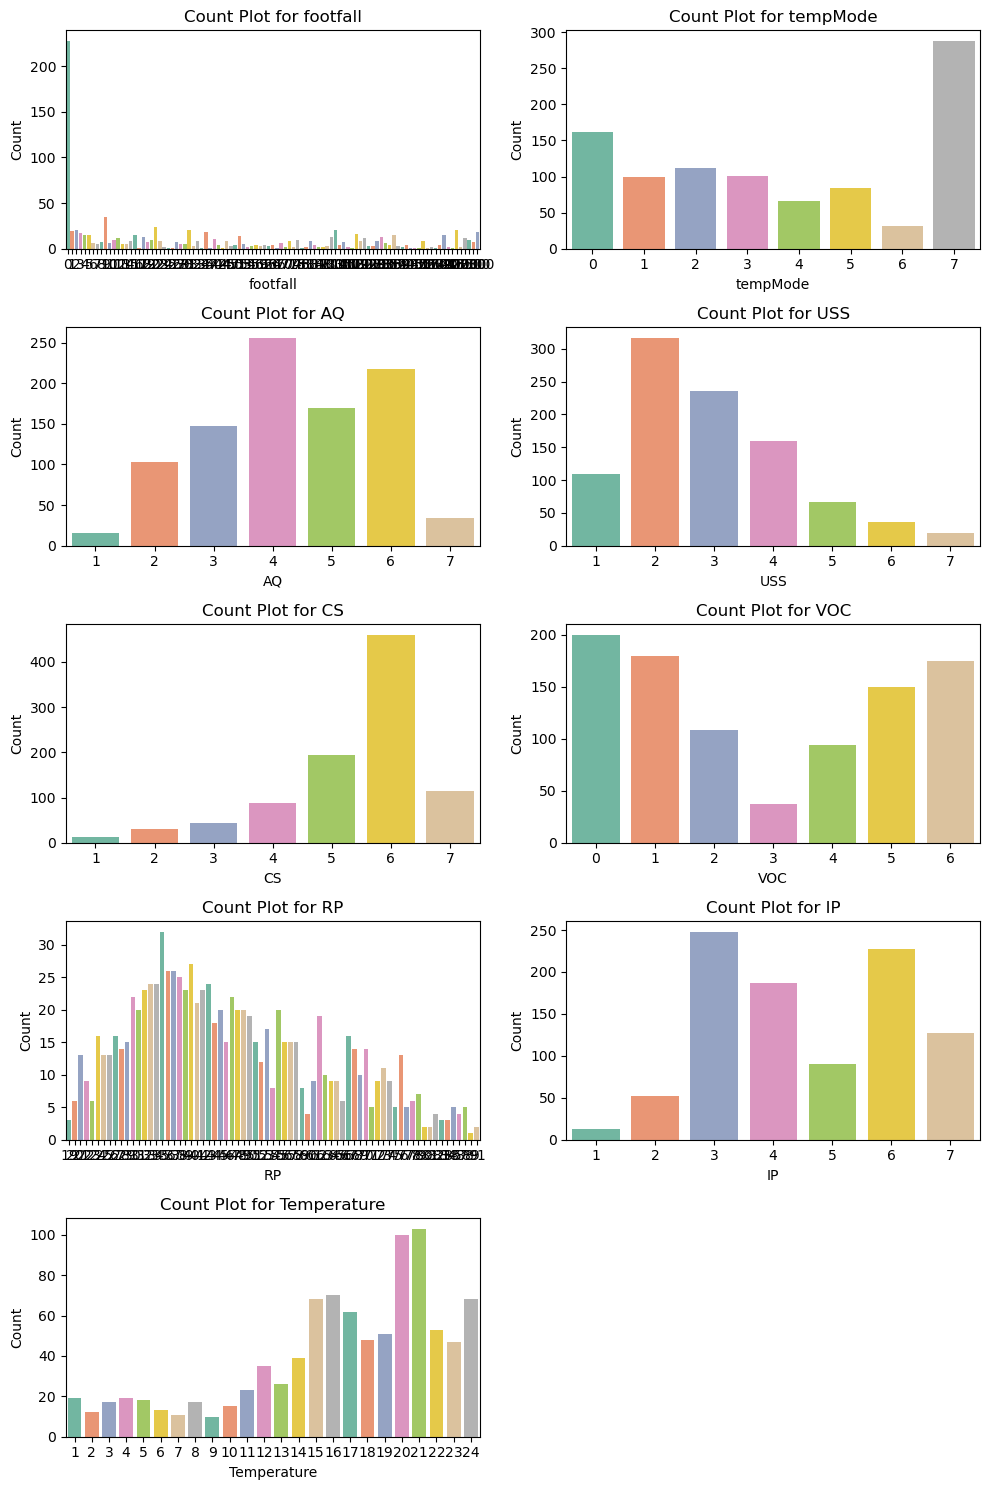

In [35]:
fig,axs=plt.subplots(5,2,figsize=(10,15))

for i,col in enumerate(D.columns):
  if col!='fail':
    sns.countplot(data=D,x=D[col],ax=axs[i//2,i%2],palette='Set2')
    axs[i//2,i%2].set_title(f'Count Plot for {col}')
    axs[i//2,i%2].set_xlabel(col)
    axs[i//2,i%2].set_ylabel('Count')
    #axs[i//2,i%2].tick_params(axis='x',rotation=90)
if len(D.columns)-1<10:
  fig.delaxes(axs[4,1])
plt.tight_layout()
plt.show()

<Axes: >

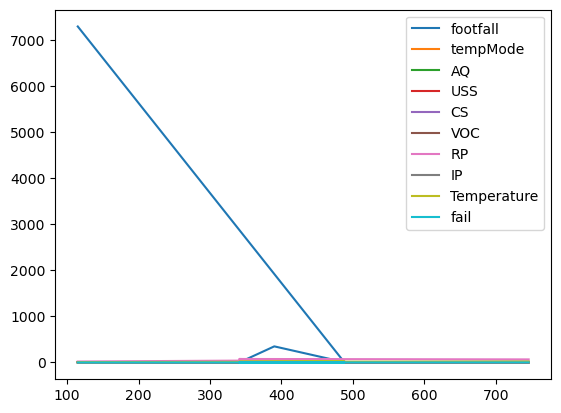

In [36]:
D.sample(5).plot()  #PLOT SAMPLE DATA

In [37]:
D.corr()*100 #SHOWS CORRELATION 

,footfall,tempMode,AQ,USS,CS,VOC,RP,IP,Temperature,fail
footfall,100.000000,2.045710,-6.581633,1.945272,2.563835,-8.959027,-4.371965,-0.386942,-1.800898,-7.306605
tempMode,2.045710,100.000000,-1.085510,0.214175,-1.395619,-5.236919,40.878426,-5.810881,-6.256824,-1.446182
AQ,-6.581633,-1.085510,100.000000,-15.688392,-9.000961,61.856955,9.465632,-10.586751,3.432784,58.323765
USS,1.945272,0.214175,-15.688392,100.000000,-35.291496,-39.947697,-3.254931,-20.641620,-22.512226,-46.657375
CS,2.563835,-1.395619,-9.000961,-35.291496,100.000000,4.803661,-2.696842,18.573905,14.397186,1.885493
VOC,-8.959027,-5.236919,61.856955,-39.947697,4.803661,100.000000,0.802311,10.362780,20.895564,79.732915
RP,-4.371965,40.878426,9.465632,-3.254931,-2.696842,0.802311,100.000000,-15.884066,-7.849861,5.366771
IP,-0.386942,-5.810881,-10.586751,-20.641620,18.573905,10.362780,-15.884066,100.000000,37.277143,8.562354
Temperature,-1.800898,-6.256824,3.432784,-22.512226,14.397186,20.895564,-7.849861,37.277143,100.000000,19.025688
fail,-7.306605,-1.446182,58.323765,-46.657375,1.885493,79.732915,5.366771,8.562354,19.025688,100.000000


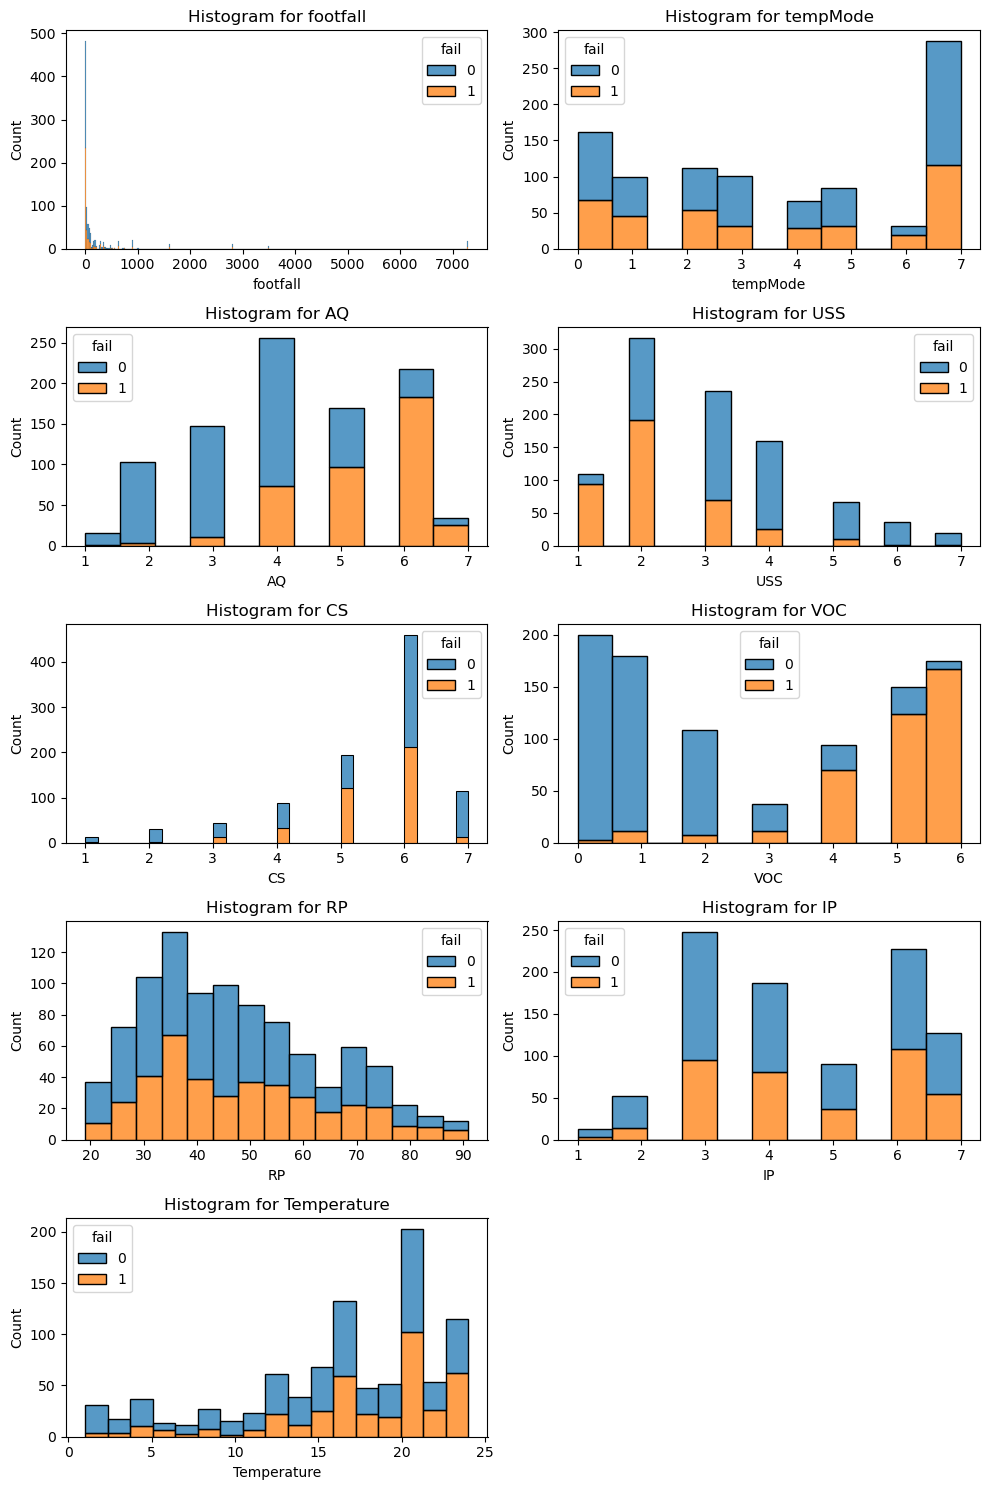

In [38]:
fig,axs=plt.subplots(5,2,figsize=(10,15))

for i,col in enumerate(D.columns):
  if col!='fail':
    sns.histplot(data=D,x=D[col],ax=axs[i//2,i%2],hue=D['fail'],multiple='stack')
    axs[i//2,i%2].set_title(f'Histogram for {col}')
    axs[i//2,i%2].set_xlabel(col)
    axs[i//2,i%2].set_ylabel('Count')
    #axs[i//2,i%2].tick_params(axis='x',rotation=90)
if len(D.columns)-1<10:
  fig.delaxes(axs[4,1])
plt.tight_layout()
plt.show()

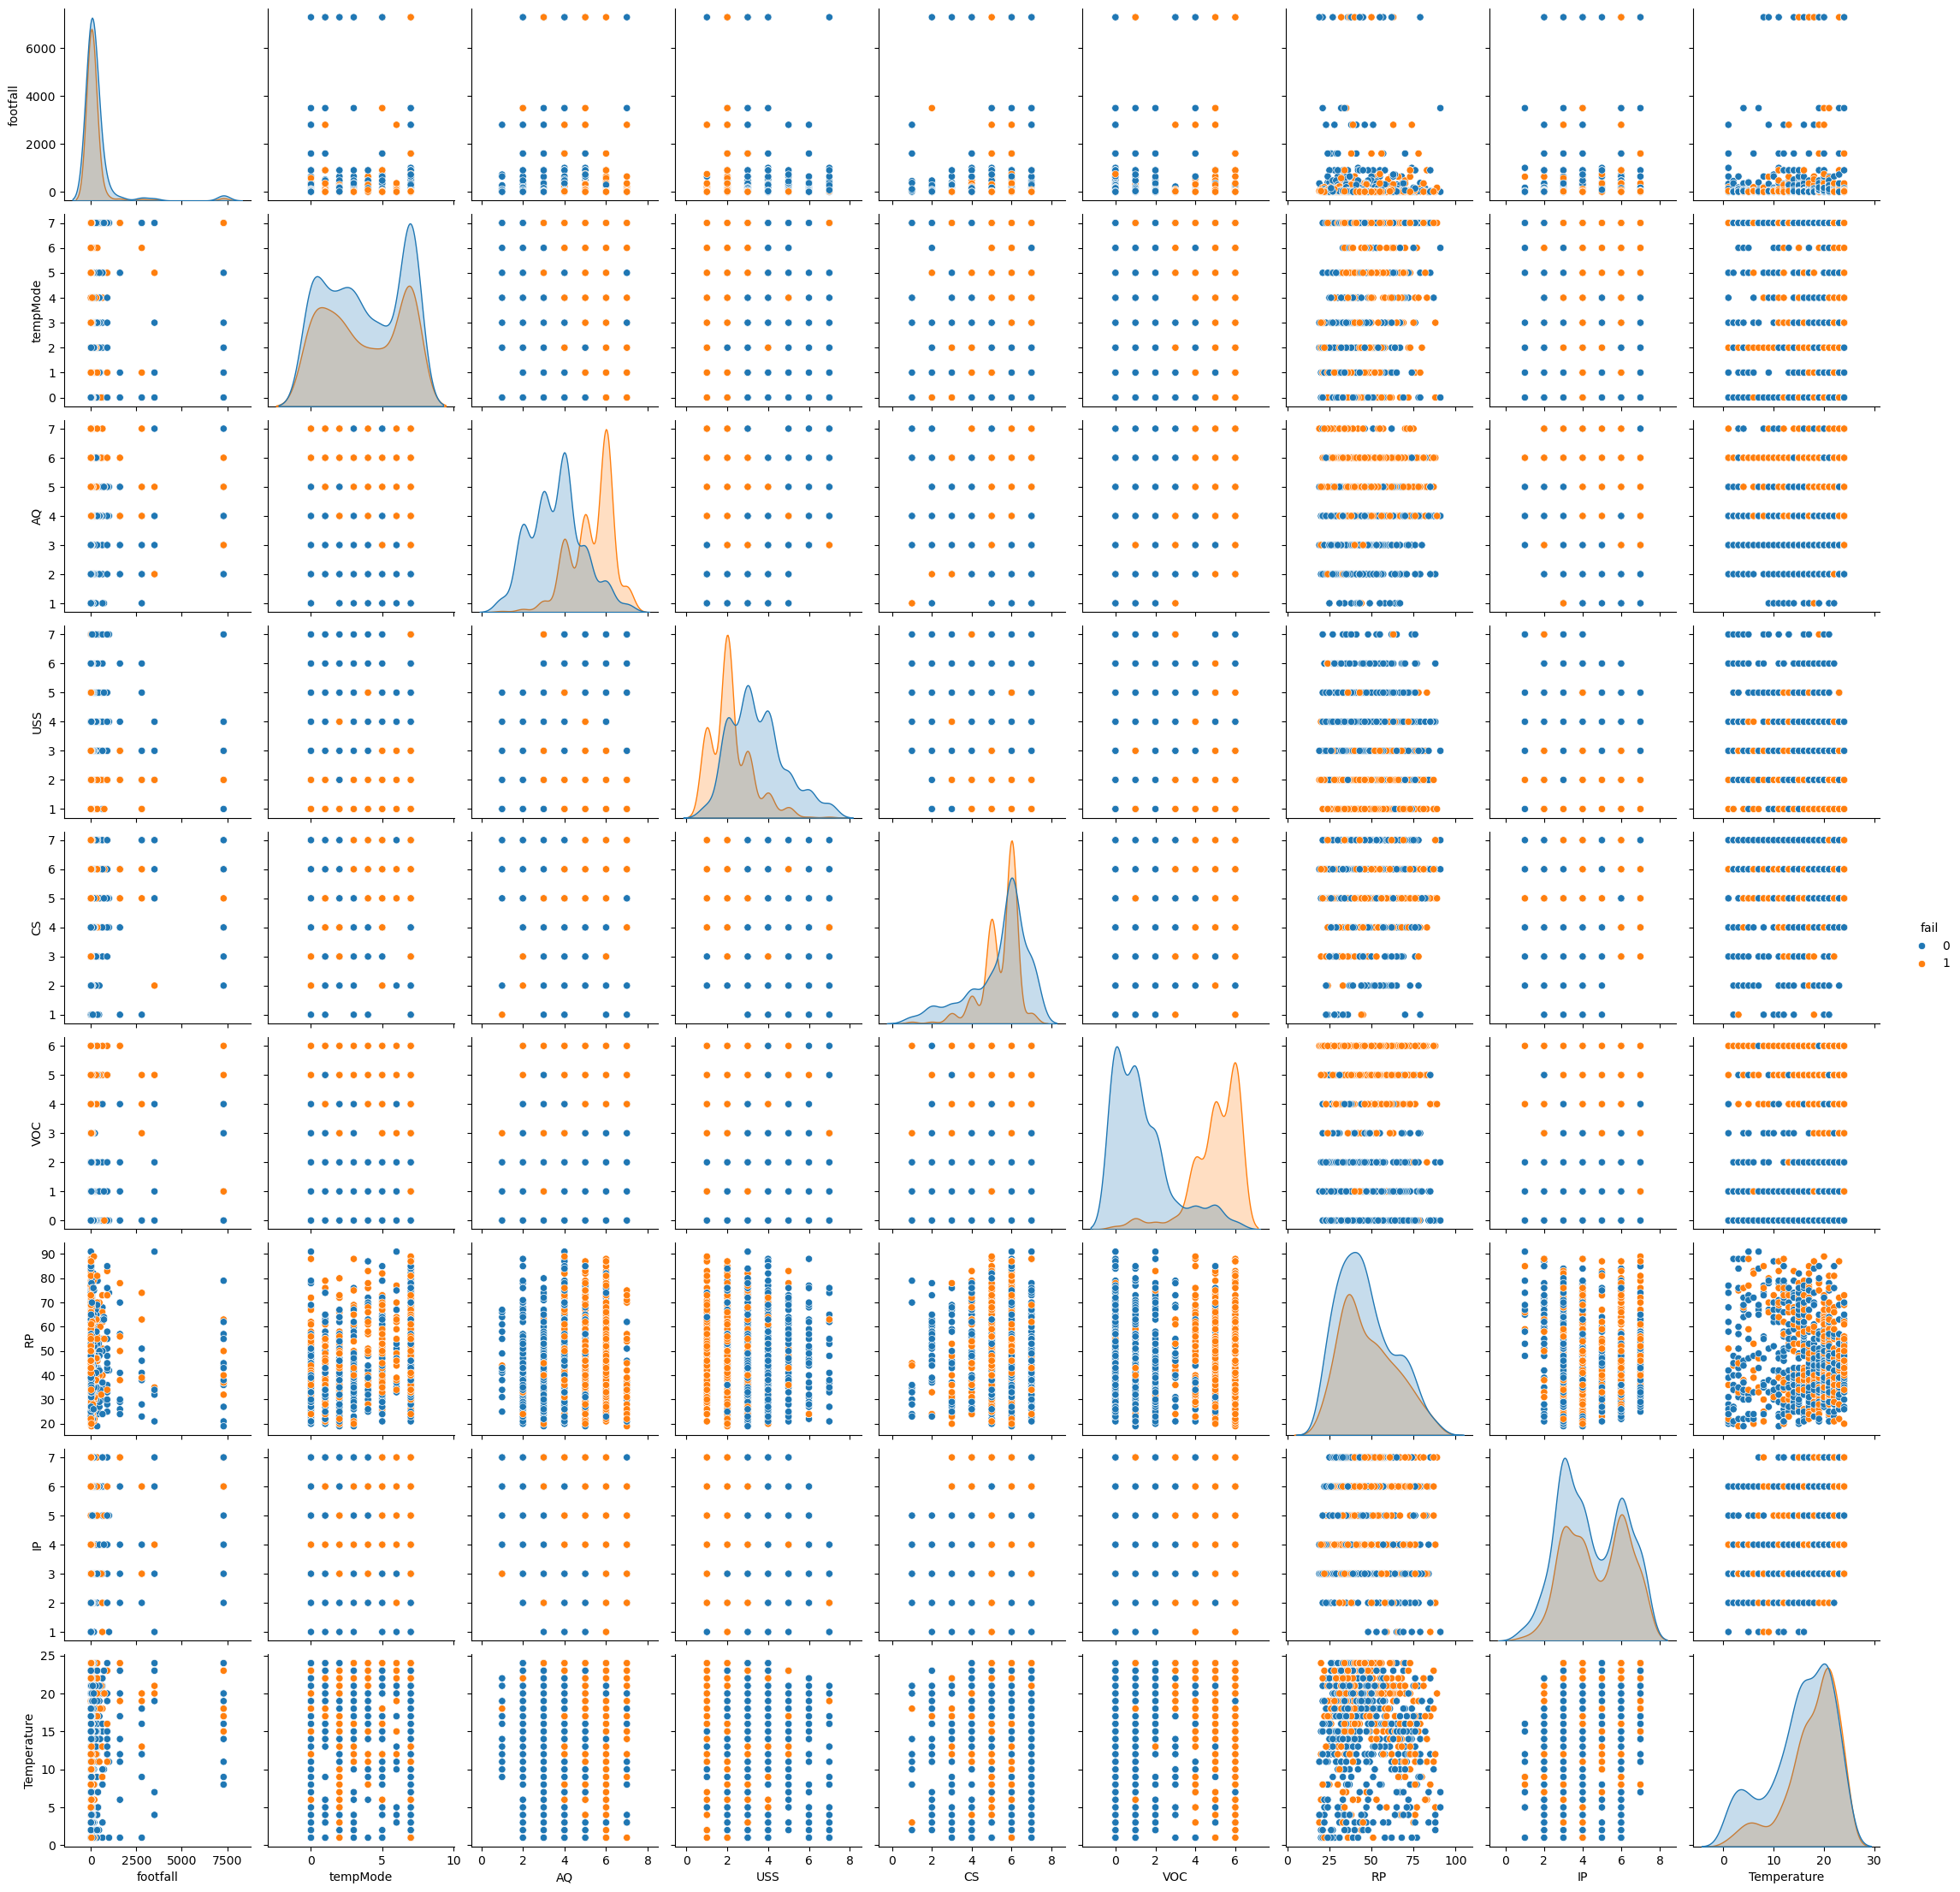

In [39]:
sns.pairplot(data=D,hue='fail')
plt.show()

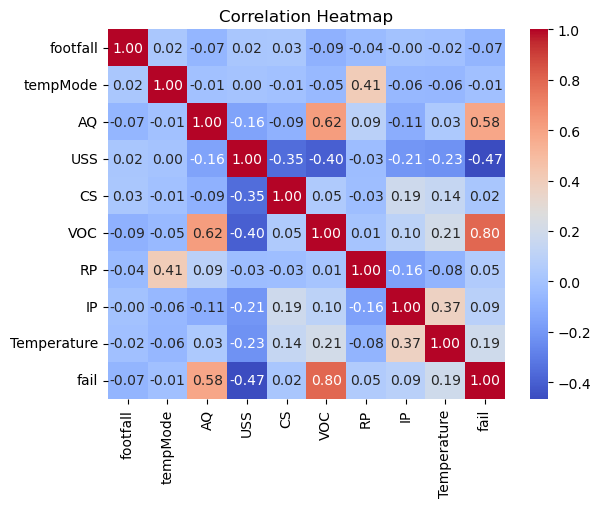

In [40]:
sns.heatmap(D.corr(),annot=True,fmt='.2f',cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

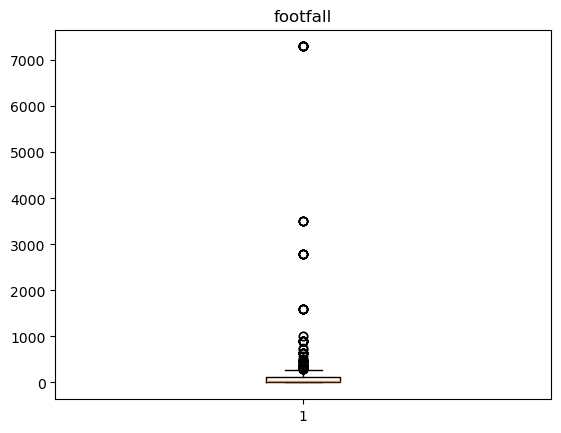

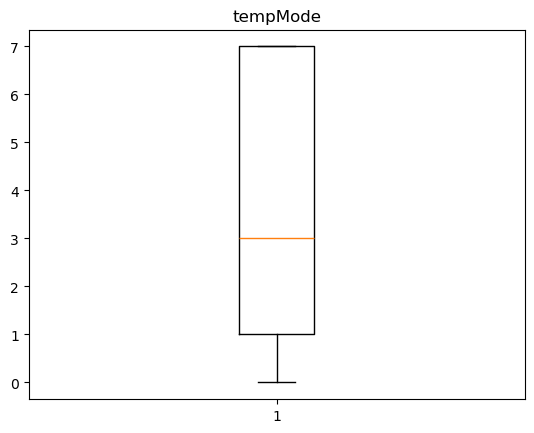

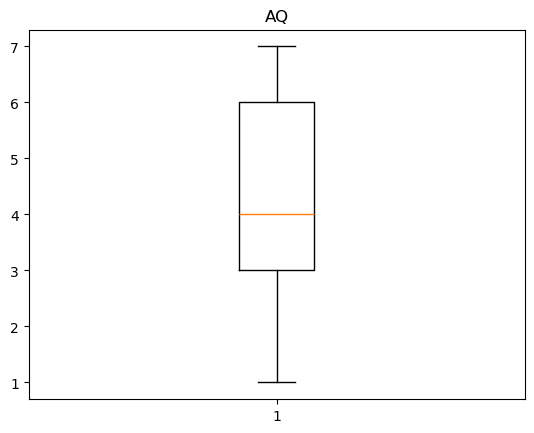

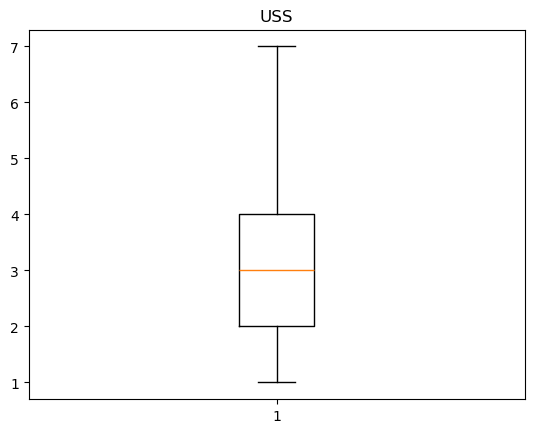

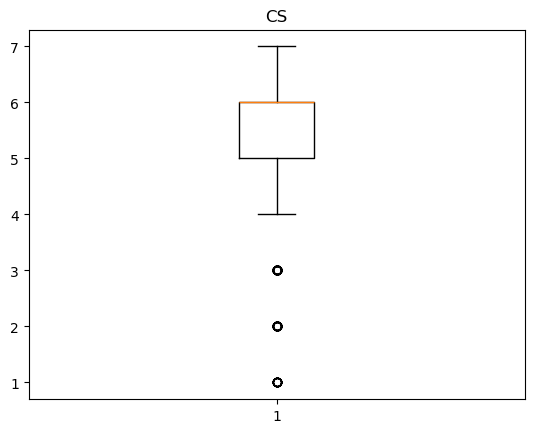

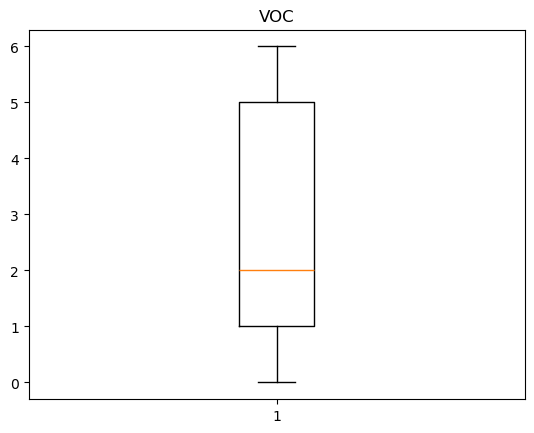

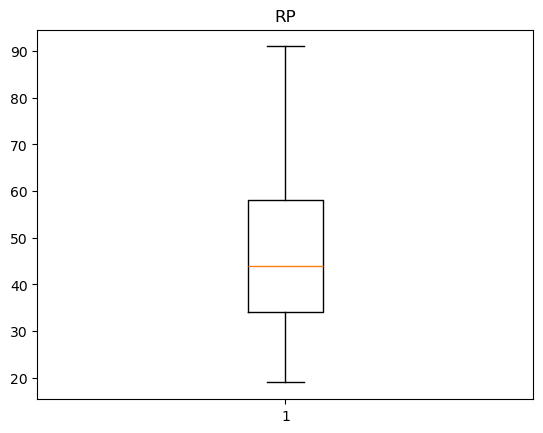

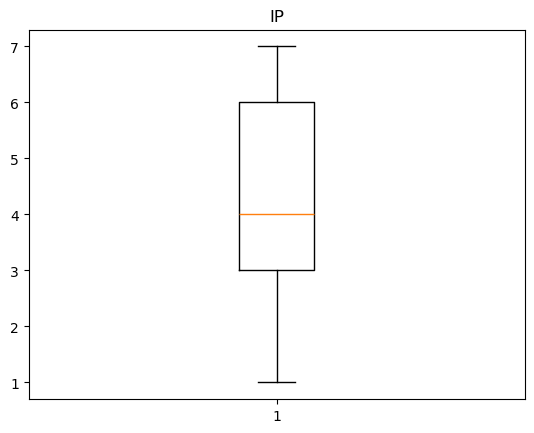

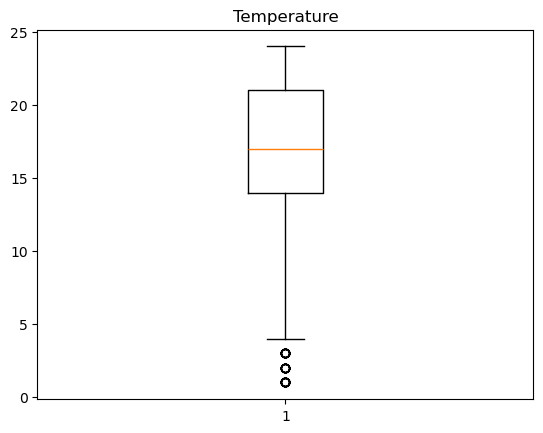

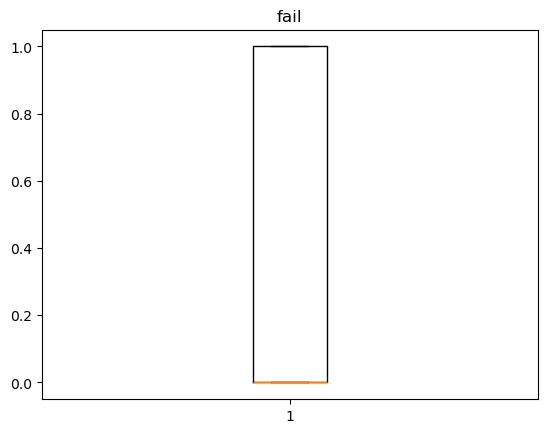

In [41]:
for i in D.columns:
    plt.boxplot(D[i])
    plt.title(i)
    plt.show()

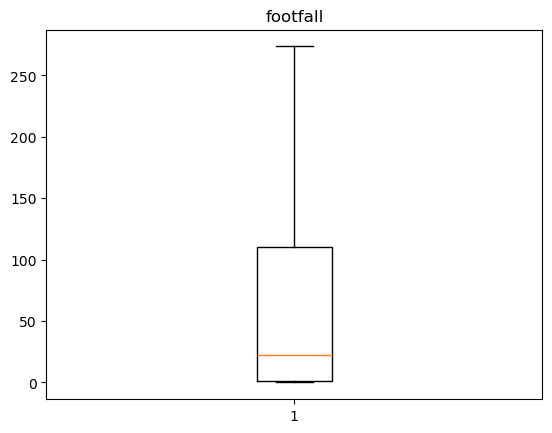

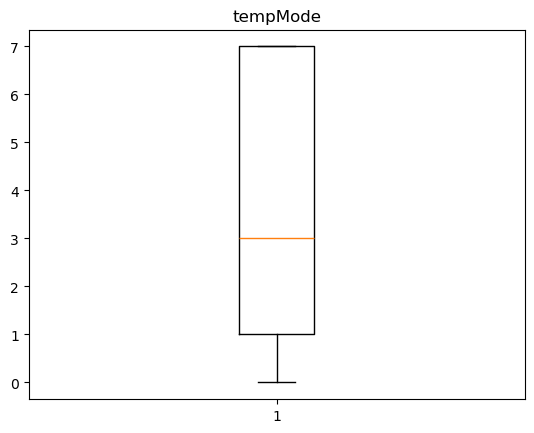

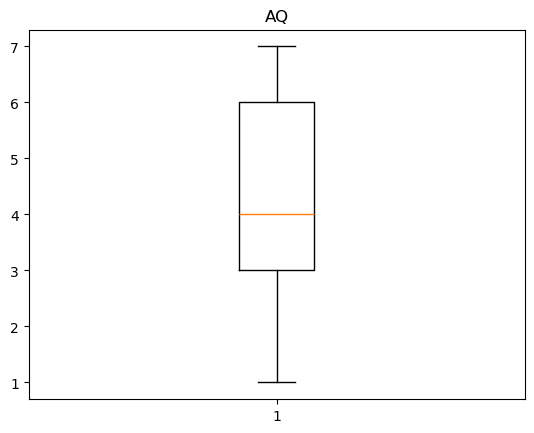

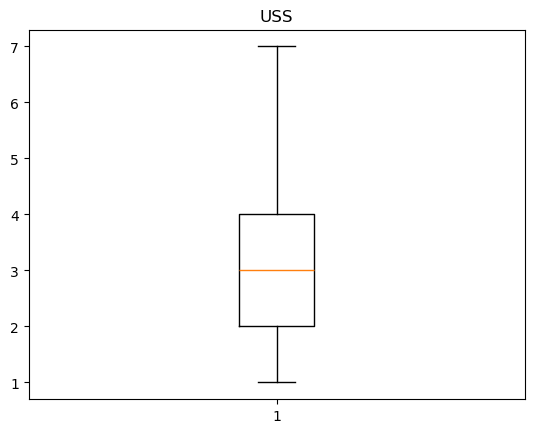

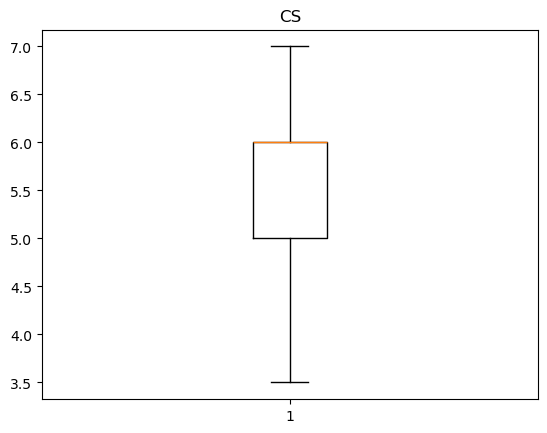

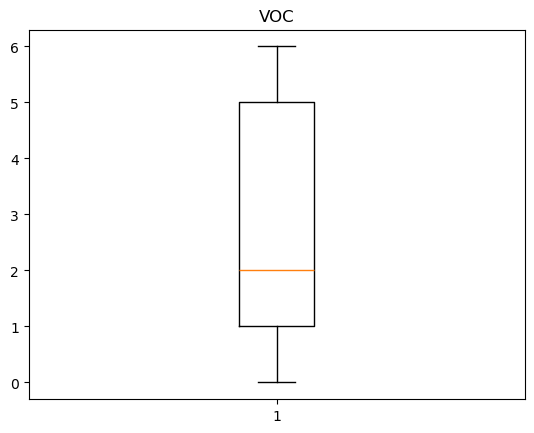

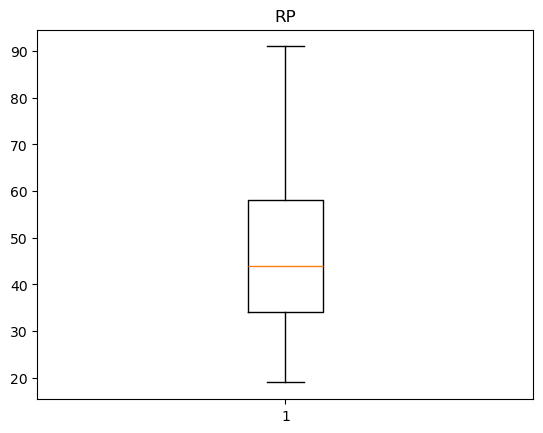

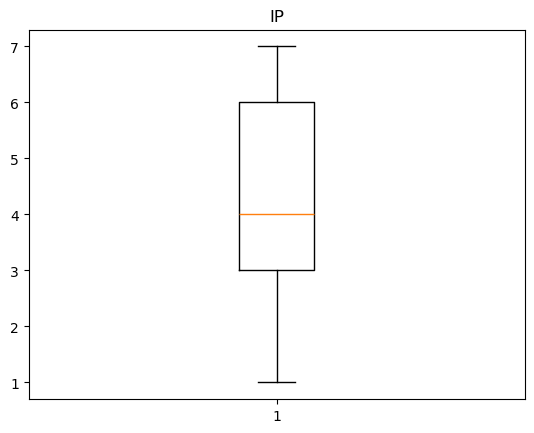

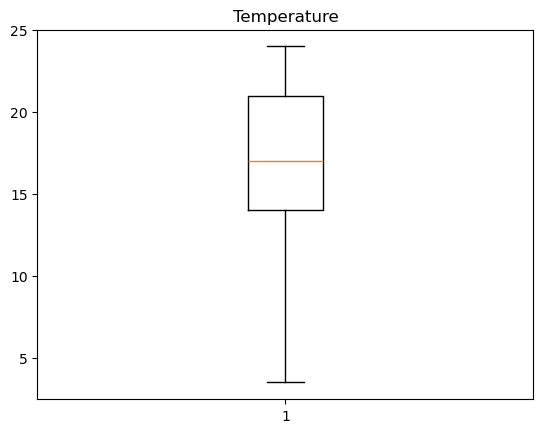

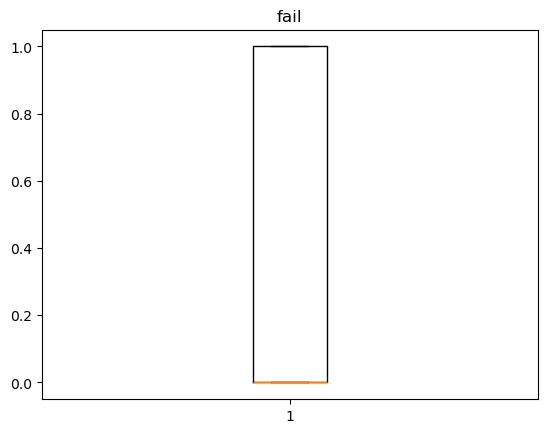

In [42]:
for i in D.columns:
    q1=D[i].quantile(.25)
    q3=D[i].quantile(.75)
    ub=q3+(1.5*(q3-q1))
    lb=q1-(1.5*(q3-q1))
    D.loc[D[i]>ub,i]=ub
    D.loc[D[i]<lb,i]=lb
    plt.boxplot(D[i])
    plt.title(i)
    plt.show()

In [43]:
D.columns

Index(['footfall', 'tempMode', 'AQ', 'USS', 'CS', 'VOC', 'RP', 'IP',
       'Temperature', 'fail'],
      dtype='object')

In [44]:
F=D.drop('fail',axis=1) #STORE DATA INTO FEATURES AND TARGET 
T=D['fail']

In [45]:
from sklearn.model_selection import train_test_split  #SPLIT THE DATASET INTO TRAIN AND TESTING DATA
x_train,x_test,y_train,y_test=train_test_split(F,T)

In [46]:
from sklearn.preprocessing import MinMaxScaler 
M=MinMaxScaler()

In [47]:
x_train

,footfall,tempMode,AQ,USS,CS,VOC,RP,IP,Temperature
46,0.0,7,4.0,3,3.5,6,45,3.0,3.5
142,2.0,2,4.0,4,5.0,3,52,3.0,10.0
917,18.0,7,6.0,2,5.0,4,48,7.0,24.0
897,273.5,1,7.0,2,6.0,6,55,6.0,24.0
694,45.0,3,5.0,2,4.0,4,61,7.0,21.0
...,...,...,...,...,...,...,...,...,...
843,2.0,7,4.0,5,5.0,3,55,3.0,23.0
44,100.0,7,4.0,4,7.0,2,43,5.0,3.5
233,273.5,0,5.0,4,7.0,0,42,2.0,13.0
474,170.0,7,6.0,2,6.0,6,49,7.0,18.0


In [48]:
x_train=M.fit_transform(x_train) #fit the data into model 
x_test=M.transform(x_test)

In [49]:
x_train

array([[0.        , 1.        , 0.5       , ..., 0.36111111, 0.33333333,
        0.        ],
       [0.00731261, 0.28571429, 0.5       , ..., 0.45833333, 0.33333333,
        0.31707317],
       [0.06581353, 1.        , 0.83333333, ..., 0.40277778, 1.        ,
        1.        ],
       ...,
       [1.        , 0.        , 0.66666667, ..., 0.31944444, 0.16666667,
        0.46341463],
       [0.62157221, 1.        , 0.83333333, ..., 0.41666667, 1.        ,
        0.70731707],
       [0.69469835, 0.57142857, 0.16666667, ..., 0.59722222, 1.        ,
        0.56097561]])

In [50]:
x_test

array([[1.        , 1.        , 0.33333333, ..., 0.47222222, 0.33333333,
        0.95121951],
       [0.        , 0.42857143, 0.16666667, ..., 0.51388889, 1.        ,
        0.90243902],
       [0.12797075, 0.28571429, 0.33333333, ..., 0.52777778, 1.        ,
        0.6097561 ],
       ...,
       [0.        , 0.        , 0.16666667, ..., 0.43055556, 0.83333333,
        0.85365854],
       [0.01828154, 1.        , 0.5       , ..., 0.16666667, 0.16666667,
        0.65853659],
       [0.01828154, 1.        , 0.5       , ..., 0.70833333, 0.33333333,
        0.31707317]])

# LOGISTIC REGRESSION:-

In [51]:
from sklearn.linear_model import LogisticRegression
L=LogisticRegression()
L.fit(x_train,y_train)

LogisticRegression()

In [52]:
L1=L.score(x_train,y_train)*100 #for training accuracy
L1

90.2542372881356

In [53]:
L2=L.score(x_test,y_test)*100 #for testing accuracy
L2

94.49152542372882

# SVC:-

In [54]:
from sklearn.svm import SVC
S=SVC()
S.fit(x_train,y_train)

SVC()

In [55]:
S1=S.score(x_train,y_train)*100
S1

92.09039548022598

In [56]:
S2=S.score(x_test,y_test)*100
S2

94.0677966101695

# NAIVES BAYES:-

In [57]:
from sklearn.naive_bayes import GaussianNB,ComplementNB,MultinomialNB,BernoulliNB
G=GaussianNB()
C=ComplementNB()
M=MultinomialNB()
B=BernoulliNB()

# GaussianNB:-

In [58]:
G.fit(x_train,y_train)

GaussianNB()

In [59]:
G1=G.score(x_train,y_train)*100
G1

90.2542372881356

In [60]:
G2=G.score(x_test,y_test)*100
G2

94.49152542372882

# BernoulliNB:-

In [61]:
B.fit(x_train,y_train)

BernoulliNB()

In [62]:
B1=B.score(x_train,y_train)*100
B1

72.03389830508475

In [63]:
B2=B.score(x_test,y_test)*100
B2

65.2542372881356

# ComplementNB:-

In [64]:
C.fit(x_train,y_train)

ComplementNB()

In [65]:
C1=C.score(x_train,y_train)*100
C1

88.2768361581921

In [66]:
C2=C.score(x_test,y_test)*100
C2

92.37288135593221

# MultinomialNB:-

In [67]:
M.fit(x_train,y_train)

MultinomialNB()

In [68]:
M1=M.score(x_train,y_train)*100
M1

87.99435028248588

In [69]:
M2=M.score(x_test,y_test)*100
M2

91.10169491525424

# K NEAREST NEIGHBOR:-

In [70]:
from sklearn.neighbors import KNeighborsClassifier
K=KNeighborsClassifier()

In [71]:
K.fit(x_train,y_train)

KNeighborsClassifier()

In [72]:
K1=K.score(x_train,y_train)*100
K1

91.66666666666666

In [73]:
K2=K.score(x_test,y_test)*100
K2

92.79661016949152

# DECISION TREE CLASSIFIER:-

In [74]:
from sklearn.tree import DecisionTreeClassifier
D=DecisionTreeClassifier()

In [75]:
D.fit(x_train,y_train)

DecisionTreeClassifier()

In [76]:
D1=D.score(x_train,y_train)*100
D1

100.0

In [77]:
D2=D.score(x_test,y_test)*100
D2

85.59322033898306

# RANDOM FOREST:-

In [78]:
from sklearn.ensemble import RandomForestClassifier
f=RandomForestClassifier()
f.fit(x_train,y_train)

RandomForestClassifier()

In [79]:
F1=f.score(x_train,y_train)*100
F1

100.0

In [80]:
F2=f.score(x_test,y_test)*100
F2

92.37288135593221

              precision    recall  f1-score   support

         0.0       0.93      0.93      0.93       134
         1.0       0.91      0.91      0.91       102

    accuracy                           0.92       236
   macro avg       0.92      0.92      0.92       236
weighted avg       0.92      0.92      0.92       236



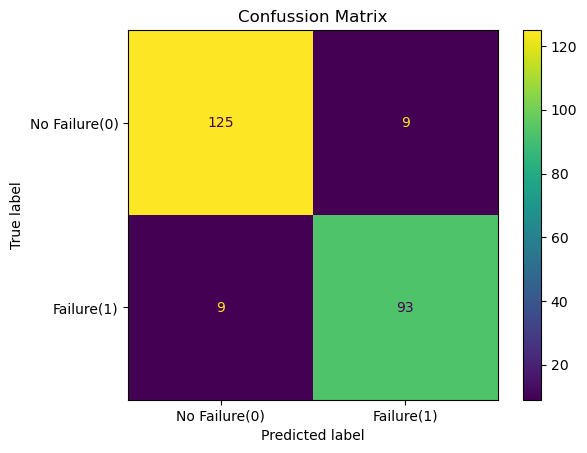

In [86]:
y_pred=f.predict(x_test)
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay

print(classification_report(y_test,y_pred))

mat=ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred),display_labels=['No Failure(0)','Failure(1)'])
mat.plot()
plt.title('Confussion Matrix')
plt.show()

#Inference:

#True Negative: Model has predicted that the machine will not fail for 118 instances.

#True Positive: Model has predicted that the machine will fail for 91 instances.

#False Positive: Model has made false prediction that 14 machines will fail.

#False Negative: Model has made false prediction that 13 machines will not fail.

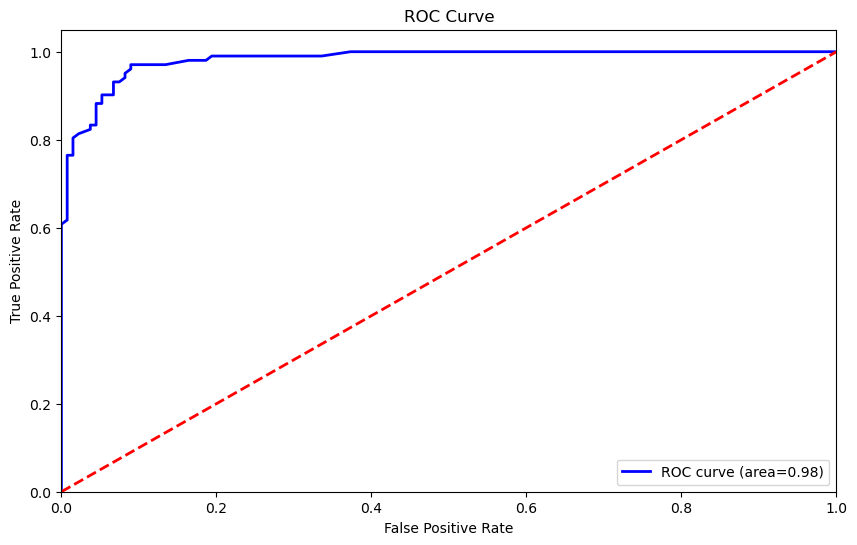

In [95]:
from sklearn.metrics import auc,roc_auc_score,roc_curve
from sklearn.svm import SVC
test_prob=f.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,test_prob)
roc_auc=auc(fpr,tpr)

plt.figure(figsize=(10,6))
plt.plot(fpr,tpr,color='blue',label=f'ROC curve (area={roc_auc:.2f})',lw=2)
plt.plot([0,1],[0,1],color='red',linestyle='--',lw=2)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# ADA BOOST:-

In [96]:
from sklearn.ensemble import AdaBoostClassifier
A=AdaBoostClassifier()

In [97]:
A.fit(x_train,y_train)

AdaBoostClassifier()

In [98]:
A1=A.score(x_train,y_train)*100
A1

91.52542372881356

In [99]:
A2=A.score(x_test,y_test)*100
A2

94.49152542372882

# ACCURACY GRAPH :-

In [100]:
AC={'Models':['LOGISTIC REGRESSION','SVC','GaussianNB','BernoulliNB','ComplementNB','MultinomialNB','K Nearest Neighbor','Decision Tree','AdaBoostClassifier','RandomForest'],'Train Accuracy':[L1,S1,G1,B1,C1,M1,K1,D1,A1,F1],'Test Accuracy':[L2,S2,G2,B2,C2,M2,K2,D2,A2,F2]}
AC=pd.DataFrame(AC)
AC=np.around(AC,2)
AC

,Models,Train Accuracy,Test Accuracy
0,LOGISTIC REGRESSION,90.25,94.49
1,SVC,92.09,94.07
2,GaussianNB,90.25,94.49
3,BernoulliNB,72.03,65.25
4,ComplementNB,88.28,92.37
5,MultinomialNB,87.99,91.10
6,K Nearest Neighbor,91.67,92.80
7,Decision Tree,100.00,85.59
8,AdaBoostClassifier,91.53,94.49
9,RandomForest,100.00,92.37


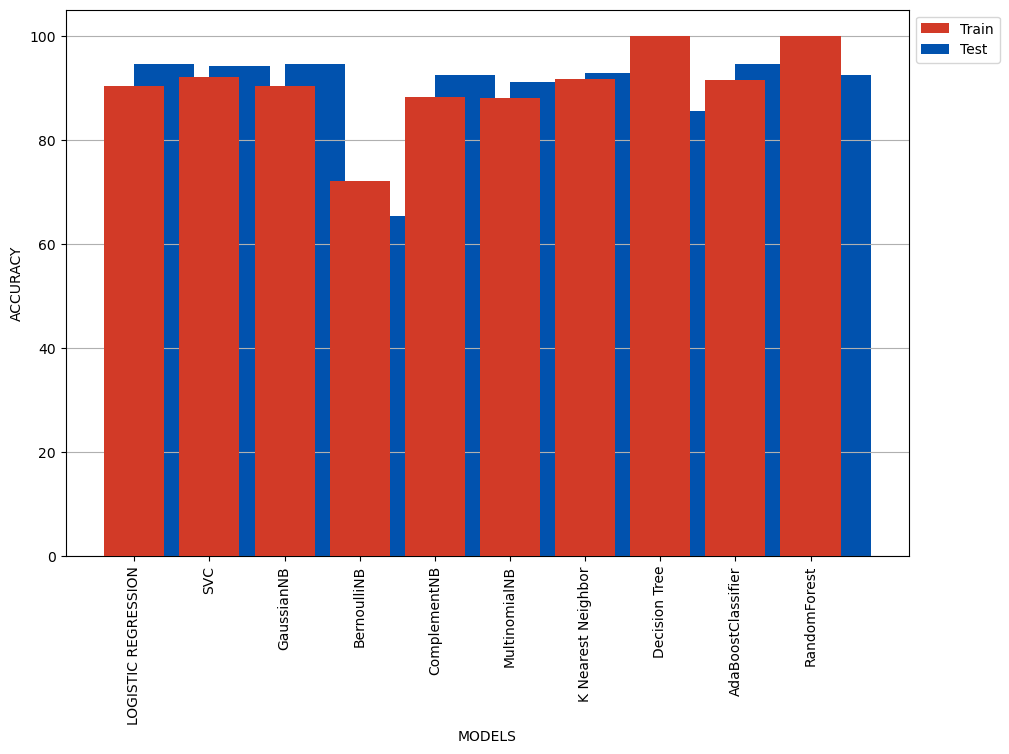

In [105]:
plt.figure(figsize=(10, 6), dpi=100) 
plt.bar(AC['Models'],AC['Train Accuracy'],label='Train',color='#d23a27',zorder=3)
plt.bar(AC['Models'],AC['Test Accuracy'],align='edge',color='#0152ae',label='Test', zorder=1)
plt.legend(bbox_to_anchor=[1,0,0,1])
plt.tight_layout()
plt.xlabel('MODELS')
plt.ylabel('ACCURACY')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()


# CONCLUSION :-
          ABOVE THE BAR CHART IT IS CLEAR THAT K Nearest Neighbor IS BEST FOR CLASSIFICATION FOR THIS 
          DATASET